In [62]:
import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
import sklearn.metrics as sm
import xgboost

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.decomposition import PCA

import pickle

In [86]:
df = pd.read_csv('Train_new4.csv')

In [87]:
df = df.replace(np.nan, 0)
#df.info()
df.shape

(3735, 27)

In [88]:
df.isna().sum()

SK1         0
SK2         0
SB1         0
SB2         0
SG1         0
           ..
Base_C      0
UT6581      0
UT578_A     0
UT578_AF    0
UT578_AS    0
Length: 27, dtype: int64

In [89]:
#df = df.drop(['Base','Base_A','Base_B','Base_C','Pro_name','UT6581','UT578_A','UT578_AF','UT578_AS'], axis=1)
df

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Target_b,Base,Pro_name,Base_A,Base_B,Base_C,UT6581,UT578_A,UT578_AF,UT578_AS
0,0.0,252.0,0.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,...,-0.33,A,UT578(A)(S),1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,10.24,A,UT578(A),1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,10.55,A,UT578(A)(F),1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,45.0,56.0,270.0,0.0,0.0,0.0,...,29.68,A,UT578(A),1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,195.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,...,-0.11,A,UT578(A),1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-13.89,C,UT578(A)(F),0.0,0.0,1.0,0.0,0.0,1.0,0.0
3731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.30,C,UT6581,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.24,C,UT6581,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.90,C,UT578(A)(F),0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SK1       3735 non-null   float64
 1   SK2       3735 non-null   float64
 2   SB1       3735 non-null   float64
 3   SB2       3735 non-null   float64
 4   SG1       3735 non-null   float64
 5   SY1       3735 non-null   float64
 6   SY2       3735 non-null   float64
 7   SY3       3735 non-null   float64
 8   SO1       3735 non-null   float64
 9   SP1       3735 non-null   float64
 10  SV1       3735 non-null   float64
 11  SR1       3735 non-null   float64
 12  SR2       3735 non-null   float64
 13  SR3       3735 non-null   float64
 14  SW1       3735 non-null   float64
 15  Target_L  3735 non-null   float64
 16  Target_a  3735 non-null   float64
 17  Target_b  3735 non-null   float64
 18  Base      3735 non-null   object 
 19  Pro_name  3735 non-null   object 
 20  Base_A    3735 non-null   floa

In [91]:
#df['Pro_name'] = df['Pro_name'].str.upper()

In [92]:
df = df.dropna()
#df['Pro_name'].unique()

In [93]:
df.shape

(3735, 27)

In [94]:
df.corr()

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Target_L,Target_a,Target_b,Base_A,Base_B,Base_C,UT6581,UT578_A,UT578_AF,UT578_AS
SK1,1.000000,-0.082656,-0.002835,-0.014548,-0.036427,-0.020067,0.006179,0.024278,0.031186,-0.020503,...,0.111315,0.036797,0.054105,0.062344,-0.017701,-0.038082,0.022579,-0.007976,-0.013194,-0.000825
SK2,-0.082656,1.000000,-0.018401,-0.116239,-0.066379,0.170683,-0.054274,-0.090171,-0.101196,-0.018935,...,-0.452220,-0.007283,-0.117062,-0.166206,-0.040461,0.167488,-0.087220,0.061584,-0.015635,0.055063
SB1,-0.002835,-0.018401,1.000000,-0.015095,-0.015630,-0.008457,-0.018935,-0.013368,-0.009426,-0.006980,...,0.034287,-0.006755,-0.021491,0.076084,-0.015904,-0.050763,-0.014511,-0.008375,0.028598,-0.011111
SB2,-0.014548,-0.116239,-0.015095,1.000000,-0.036856,-0.148094,-0.147115,-0.110303,-0.095694,-0.030899,...,-0.317766,-0.189593,-0.480070,-0.163395,-0.085726,0.199236,0.023900,0.015797,-0.013374,-0.024820
SG1,-0.036427,-0.066379,-0.015630,-0.036856,1.000000,-0.082228,0.093259,-0.063463,-0.094822,-0.000101,...,-0.218590,-0.525262,-0.024525,-0.171564,-0.079765,0.201485,0.002236,0.000799,0.023046,-0.031353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Base_C,-0.038082,0.167488,-0.050763,0.199236,0.201485,0.087398,0.262058,0.196816,0.129478,0.103354,...,-0.714186,0.067722,0.110254,-0.675213,-0.589017,1.000000,-0.000654,-0.053285,0.054154,-0.014391
UT6581,0.022579,-0.087220,-0.014511,0.023900,0.002236,-0.070197,0.040088,0.081323,0.046920,-0.034940,...,0.057672,-0.014146,0.071120,0.032979,-0.035262,-0.000654,1.000000,-0.265780,-0.449942,-0.284526
UT578_A,-0.007976,0.061584,-0.008375,0.015797,0.000799,0.017715,-0.062157,-0.060023,-0.053338,-0.023774,...,0.032618,-0.047777,-0.089594,0.046109,0.020287,-0.053285,-0.265780,1.000000,-0.360685,-0.228083
UT578_AF,-0.013194,-0.015635,0.028598,-0.013374,0.023046,0.020773,0.025292,-0.006634,0.019885,0.048061,...,-0.078800,0.058452,0.029513,-0.077196,0.012615,0.054154,-0.449942,-0.360685,1.000000,-0.386125


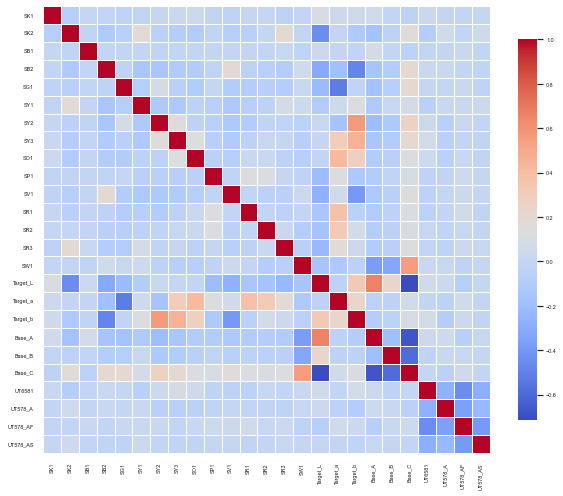

In [95]:
df.corr()
sns.set(rc = {'figure.figsize':(10,10)},font_scale=0.5)
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(df.corr(),  vmax=1, square=True, cbar_kws={"shrink": 0.7}, annot = False, cmap='coolwarm', linewidths=.5)
    

In [37]:
"""df = df_product

for column in df.columns:
    if df[column].nunique() <=2:
        df.drop([column], axis=1, inplace=True)

df.shape

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_20768/1844699459.py, line 7)

In [96]:
dupli = df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(3735, 27)

In [97]:
nunique = df.nunique()

nunique = pd.DataFrame(nunique)
pd.set_option('display.max_rows', nunique.shape[0]+1)
nunique

,0
SK1,64
SK2,414
SB1,15
SB2,415
SG1,419
SY1,413
SY2,506
SY3,384
SO1,291
SP1,240


In [98]:
df.head()

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Target_b,Base,Pro_name,Base_A,Base_B,Base_C,UT6581,UT578_A,UT578_AF,UT578_AS
0,0.0,252.0,0.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,...,-0.33,A,UT578(A)(S),1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,10.24,A,UT578(A),1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,...,10.55,A,UT578(A)(F),1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,45.0,56.0,270.0,0.0,0.0,0.0,...,29.68,A,UT578(A),1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,195.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,...,-0.11,A,UT578(A),1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
def feature_m(X,y):
    

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)
        
    rfe = MultiOutputRegressor(RandomForestRegressor())
    
    scaler = StandardScaler().fit(X_train)
    rescaledX = scaler.transform(X_train)

      
    rfe.fit(rescaledX, y_train)
        
    f_importance = pd.DataFrame(rfe.estimators_[0].feature_importances_,columns=['importance'],index=X_train.columns)
    
    f_importance = f_importance.sort_values(by='importance', ascending = False)
    
    
    return f_importance

In [100]:
def multioutput_model_compare(X_train,y_train,X_test,y_test):
    
    models = []
    models.append(('LR', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())]))))
    models.append(('LASSO', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())]))))
    #models.append(('Gaussian', Pipeline([('Scaler', StandardScaler()),('Gaussian',gp())])))
    models.append(('KNN', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())]))))
    models.append(('CART', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())]))))
    models.append(('AB', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())]))))
    models.append(('GBM', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()), ('GBM',GradientBoostingRegressor(n_estimators=75))]))))
    models.append(('xgboost', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('xgboost',xgboost.XGBRegressor(n_estimators= 100))]))))
    models.append(('RF', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))) 
    models.append(('ET', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())]))))
            
            
    
    results = []
    names = []

    msg = []
    mean = []
    std = []

    Title = []
    MAE = []
    MSE = []
    R2 = []


    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        results.append(abs(cv_results))
        names.append(name)
#    names.append(name)
        msg.append('%s' % (name))
        mean.append('%f' %  (abs(cv_results.mean())))
        std.append('%f' % (cv_results.std()))
#    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    
    
        model = model
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        predictions2 = model.predict(X_train)
    
        y_test = np.array(y_test)
    
        y_test = pd.DataFrame(y_test)
        predictions = pd.DataFrame(predictions)
    
    
        Title.append('%s' % name)
        MAE.append('%f' %  round(sm.mean_absolute_error(y_test, predictions),5))
    
   
        MSE.append('%f' %  round(sm.mean_squared_error(y_test, predictions),5))
        R2.append('%f' %  round(sm.r2_score(y_test,predictions),5))

    
    Final_result = pd.DataFrame(np.transpose(msg))
    Final_result.columns = ['Model']
    Final_result['Mean'] = pd.DataFrame(np.transpose(mean))
    Final_result['Std'] = pd.DataFrame(np.transpose(std))

    Final_result['MSE'] = pd.DataFrame(MSE)
    Final_result['R2'] = pd.DataFrame(R2)
    
    
    max1 = Final_result['R2'].max()
    max2 = Final_result.sort_values('R2', ascending=False).head(3)
    
    max1 = Final_result[Final_result['R2']==max1]


    return Final_result, max1, max2

In [101]:
def M_single_model(max1,X_train,y_train,X_test,y_test):
    
    
    
    models = []

    if max1['Model'].values == 'LR':
        models.append(('LR', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())]))))
    if max1['Model'].values == 'LASSO':
        models.append(('LASSO', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())]))))
    if max1['Model'].values == 'KNN':
        models.append(('KNN', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())]))))
    if max1['Model'].values == 'CART':
        models.append(('CART', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())]))))
    if max1['Model'].values == 'AB':
        models.append(('AB', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())]))))
    if max1['Model'].values == 'GBM':
        models.append(('GBM', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()), ('GBM',GradientBoostingRegressor())]))))
    if max1['Model'].values == 'xgboost':
        models.append(('xgboost', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('xgboost',xgboost.XGBRegressor())]))))
    if max1['Model'].values == 'RF':
        models.append(('RF', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))) 
    if max1['Model'].values == 'ET':
        models.append(('ET', MultiOutputRegressor(Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())]))))

            

    results = []
    names = []

    msg = []
    mean = []
    std = []

    Title = []
    MAE = []
    MSE = []
    R2 = []

    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        results.append(abs(cv_results))
        names.append(name)
#    names.append(name)
        msg.append('%s' % (name))
        mean.append('%f' %  (abs(cv_results.mean())))
        std.append('%f' % (cv_results.std()))
#    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    
    
        model = model
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        predictions2 = model.predict(X_train)
    
        y_test = np.array(y_test)
    
        y_test = pd.DataFrame(y_test)
        predictions = pd.DataFrame(predictions)
    
    
        Title.append('%s' % name)
        MAE.append('%f' %  round(sm.mean_absolute_error(y_test, predictions),5))
    
   
        MSE.append('%f' %  round(sm.mean_squared_error(y_test, predictions),5))
        R2.append('%f' %  round(sm.r2_score(y_test,predictions),5))

    
    Final_result = pd.DataFrame(np.transpose(msg))
    Final_result.columns = ['Model']
    Final_result['Mean'] = pd.DataFrame(np.transpose(mean))
    Final_result['Std'] = pd.DataFrame(np.transpose(std))

    Final_result['MSE'] = pd.DataFrame(MSE)
    Final_result['R2'] = pd.DataFrame(R2)
    
    
    with open("M_single.pickle","wb") as fw:
        pickle.dump(model, fw)


    return Final_result

In [102]:
# x,y 인자 선정

#X = df.drop(['Final_Dl','Final_Da','Final_Db'], axis=1)
X = df.drop(['Base','Pro_name','Target_L','Target_a','Target_b'], axis=1)

y = df[['Target_L','Target_a','Target_b']]

X2 = pd.concat((X, y),axis=1)
X2.to_csv('train.csv',index = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=7)
#X_test3 = X_test2.copy()
#X_test3

In [103]:
check = feature_m(X,y)
check

,importance
Base_C,0.520514
SK2,0.149500
SW1,0.085213
SY2,0.071049
Base_B,0.030118
SO1,0.024998
Base_A,0.024706
SB2,0.021099
SG1,0.015629
SY3,0.013959


In [104]:

# 전체 Y값을 대상으로 Multioutput 모델 예측
MF1, M_max1, M_max2 = multioutput_model_compare(X_train,y_train,X_test,y_test)


Fl1 = M_single_model(M_max1,X_train,y_train,X_test,y_test)

with open("M_single.pickle","rb") as fr:
    model = pickle.load(fr)

M_single = model.predict(X_test)

M_single = pd.DataFrame(M_single)

M_single.head()

,0,1,2
0,65.7208,-43.8573,8.4515
1,47.2671,-13.8970,-17.6213
2,29.7831,4.5841,-14.6906
3,42.9990,7.7209,21.4550
4,46.4220,17.8679,18.9076


In [105]:
MF1

,Model,Mean,Std,MSE,R2
0,LR,0.770099,0.028471,87.731550,0.789040
1,LASSO,0.749981,0.013159,97.906840,0.761690
2,KNN,0.859350,0.014188,50.562610,0.873490
3,CART,0.924189,0.010159,25.316580,0.938600
4,AB,0.821672,0.012758,78.205800,0.812440
5,GBM,0.937382,0.003875,24.127170,0.941180
6,xgboost,0.974932,0.002478,8.101170,0.980010
7,RF,0.966127,0.003566,10.645190,0.973590
8,ET,0.975891,0.004332,7.581080,0.981220


In [106]:
# 정확도 확인 후 그래프 그리기

Final_R2 = []
#Final_R2.columns = ['Single']

Final_R2.append('%f' %  round(sm.r2_score(y_test,M_single),5))

Final_R2


['0.981000']

In [107]:
M_single

,0,1,2
0,65.7208,-43.8573,8.451500
1,47.2671,-13.8970,-17.621300
2,29.7831,4.5841,-14.690600
3,42.9990,7.7209,21.455000
4,46.4220,17.8679,18.907600
...,...,...,...
742,68.3194,32.1618,64.528000
743,33.2852,0.8680,5.462300
744,28.0465,4.2812,2.334867
745,45.8380,-23.4330,13.446400


In [108]:
y_test = y_test.reset_index(drop=True)
y_test

,Target_L,Target_a,Target_b
0,66.93,-46.96,9.39
1,45.90,-12.42,-18.34
2,28.99,1.55,-13.41
3,45.21,1.89,20.79
4,46.32,17.98,18.88
...,...,...,...
742,70.33,33.20,64.93
743,33.13,0.05,5.48
744,27.79,3.43,1.47
745,46.27,-19.44,14.35


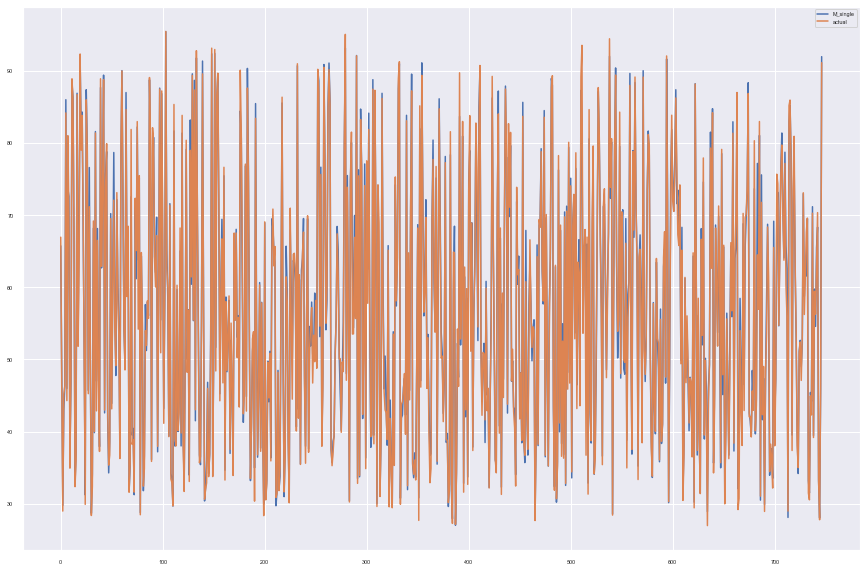

In [109]:
plt.figure(figsize=(15,10))
#plt.plot(single.iloc[:,0].values, label='single')
plt.plot(M_single.iloc[:,0].values, label='M_single')
#plt.plot(Voting.iloc[:,0].values, label='Voting')
plt.plot(y_test.iloc[:,0].values, label='actual')
plt.legend()
plt.show()

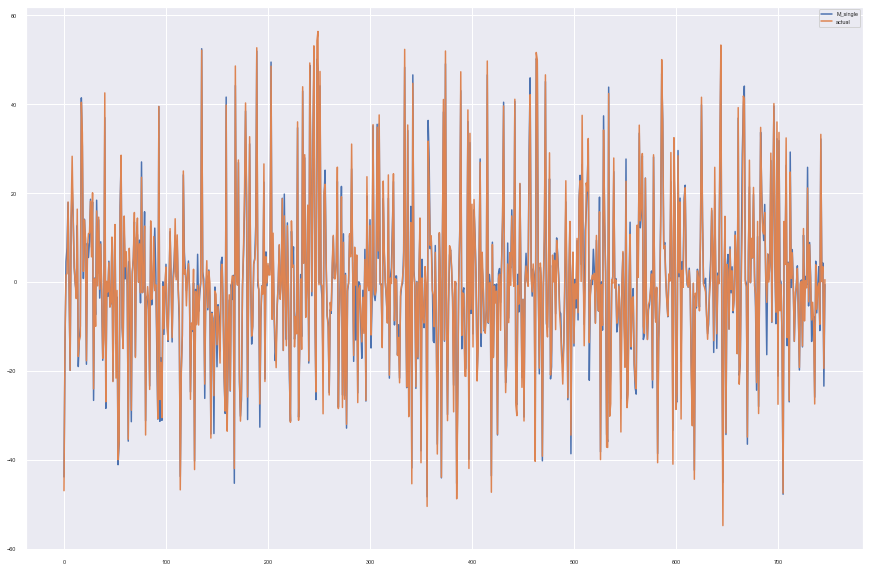

In [110]:
plt.figure(figsize=(15,10))
#plt.plot(single.iloc[:,1].values, label='single')
plt.plot(M_single.iloc[:,1].values, label='M_single')
#plt.plot(Voting.iloc[:,1].values, label='Voting')
plt.plot(y_test.iloc[:,1].values, label='actual')
plt.legend()
plt.show()

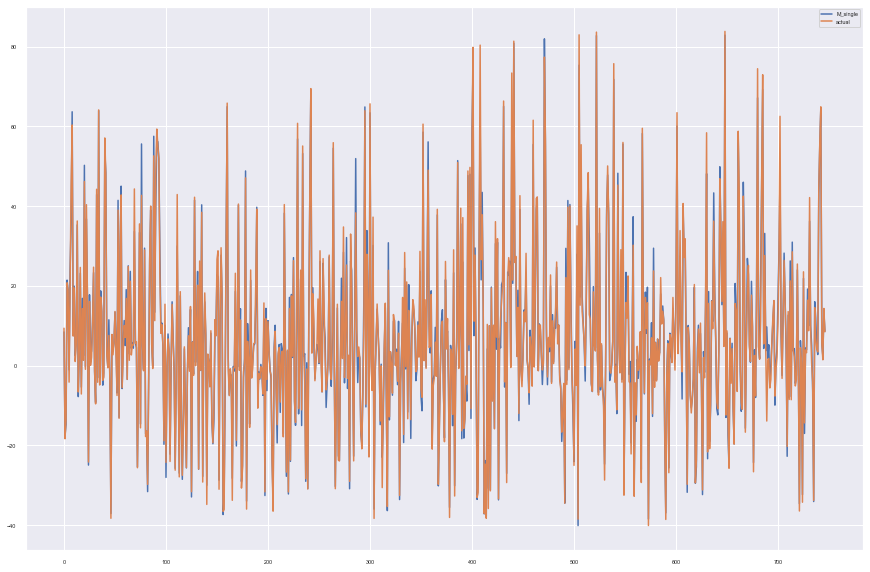

In [111]:
plt.figure(figsize=(15,10))
#plt.plot(single.iloc[:,2].values, label='single')
plt.plot(M_single.iloc[:,2].values, label='M_single')
#plt.plot(Voting.iloc[:,2].values, label='Voting')
plt.plot(y_test.iloc[:,2].values, label='actual')
plt.legend()
plt.show()

In [383]:
# Hyperparameter 최적화

In [384]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
    

results = []
names = []

msg = []
mean = []
std = []

Title = []
MAE = []
MSE = []
R2 = []



params = {
    'n_estimators': [5,10, 50, 75, 100, 150, 200, 250, 300, 500], 
}

grid_search = GridSearchCV(ExtraTreesRegressor(), params, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(rescaledX, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(),
             param_grid={'n_estimators': [5, 10, 50, 75, 100, 150, 200, 250,
                                          300, 500]},
             scoring='neg_mean_squared_error')

In [385]:
grid_search.best_params_

{'n_estimators': 300}

In [128]:
# Final Optimum Model

import sklearn.metrics as sm
from sklearn.cross_decomposition import PLSRegression
import sklearn.gaussian_process as gp
import xgboost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

models = []
models.append(('ET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor(n_estimators=300))]))) 

results = []
names = []

msg = []
mean = []
std = []

Title = []
MAE = []
MSE = []
R2 = []


for name, model in models:
    kfold = KFold(n_splits=5, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(abs(cv_results))
    names.append(name)
#    names.append(name)
    msg.append('%s' % (name))
    mean.append('%f' %  (abs(cv_results.mean())))
    std.append('%f' % (cv_results.std()))
#    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    
    
    model = model
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    predictions2 = model.predict(X_train)
    
    y_test = np.array(y_test)
    
    y_test = pd.DataFrame(y_test)
    predictions = pd.DataFrame(predictions)
    
    
    Title.append('%s' % name)
    MAE.append('%f' %  round(sm.mean_absolute_error(y_test, predictions),5))
    
#    print(round(sm.mean_absolute_error(y_test, predictions),5))
#    print(round(sm.mean_absolute_error(y_test[0], predictions[0]),5))
#    print(round(sm.mean_absolute_error(y_test[1], predictions[1]),5))
    
    MSE.append('%f' %  round(sm.mean_squared_error(y_test, predictions),5))
    R2.append('%f' %  round(sm.r2_score(y_test,predictions),5))

    
Final_result = pd.DataFrame(np.transpose(msg))
Final_result.columns = ['Model']
Final_result['Mean'] = pd.DataFrame(np.transpose(mean))
Final_result['Std'] = pd.DataFrame(np.transpose(std))
Final_result

,Model,Mean,Std
0,ET,0.970508,0.003610


In [129]:
F2_result = pd.DataFrame(Title)
F2_result.columns = ['Model']
#F2_result['MAE'] = pd.DataFrame(MAE)
F2_result['MSE'] = pd.DataFrame(MSE)
F2_result['R2'] = pd.DataFrame(R2)
#F_result['Std'] = pd.DataFrame(round(sm.r2_score(y_test,predictions),5))

F2_result

,Model,MSE,R2
0,ET,9.058890,0.977000


In [130]:
predictions = model.predict(X_test)
pred_list = ['Pred_L','Pred_a','Pred_b']
predictions = pd.DataFrame(predictions,columns = pred_list)
predictions

,Pred_L,Pred_a,Pred_b
0,64.034867,-39.495500,5.798267
1,49.055867,-16.048700,-15.297300
2,30.290967,1.143033,-15.843800
3,45.008583,5.802867,22.730667
4,45.948733,17.912433,18.438867
...,...,...,...
742,70.172667,32.700733,64.084033
743,32.113667,0.844200,5.219567
744,28.729933,3.863400,1.939867
745,45.711433,-23.441633,12.980700


In [131]:
targ_list = ['Target_L','Target_a','Target_b']
y_test.columns = targ_list

y_test

,Target_L,Target_a,Target_b
0,66.93,-46.96,9.39
1,45.90,-12.42,-18.34
2,28.99,1.55,-13.41
3,45.21,1.89,20.79
4,46.32,17.98,18.88
...,...,...,...
742,70.33,33.20,64.93
743,33.13,0.05,5.48
744,27.79,3.43,1.47
745,46.27,-19.44,14.35


In [132]:
new_result = pd.concat((y_test, predictions),axis=1)
new_result['Delta_E'] = ((y_test['Target_L'] - predictions['Pred_L'])**2+(y_test['Target_a'] - predictions['Pred_a'])**2+(y_test['Target_b'] - predictions['Pred_b'])**2)**0.5 
new_result

,Target_L,Target_a,Target_b,Pred_L,Pred_a,Pred_b,Delta_E
0,66.93,-46.96,9.39,64.034867,-39.495500,5.798267,8.775027
1,45.90,-12.42,-18.34,49.055867,-16.048700,-15.297300,5.690780
2,28.99,1.55,-13.41,30.290967,1.143033,-15.843800,2.789537
3,45.21,1.89,20.79,45.008583,5.802867,22.730667,4.372331
4,46.32,17.98,18.88,45.948733,17.912433,18.438867,0.580519
...,...,...,...,...,...,...,...
742,70.33,33.20,64.93,70.172667,32.700733,64.084033,0.994827
743,33.13,0.05,5.48,32.113667,0.844200,5.219567,1.315870
744,27.79,3.43,1.47,28.729933,3.863400,1.939867,1.136699
745,46.27,-19.44,14.35,45.711433,-23.441633,12.980700,4.266151


In [133]:
test = new_result['Delta_E'].mean()
test

3.837358665348524

In [134]:
new_result[new_result['Delta_E']<1.5].count()

Target_L    164
Target_a    164
Target_b    164
Pred_L      164
Pred_a      164
Pred_b      164
Delta_E     164
dtype: int64

In [135]:
new_result.shape

(747, 7)